In [1]:
from skimage.color import rgb2gray, rgb2lab, deltaE_cie76
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from collections import Counter

In [10]:
#get all image file names
image_names = []

import os
for file in os.listdir("./HARV_Canopy"):
    if file.endswith(".jpg"):
        image_names.append(file)

image_names.sort()
    
image_names = [name for name in image_names if "2021" in name]


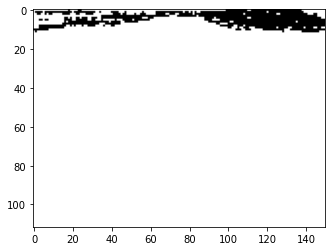

In [11]:


mask = None
for image in image_names:
    img = cv2.imread("./HARV_Canopy/" + image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    white_mask = cv2.inRange(hsv, (0,0,90), (172,100,255))
    if mask is None:
        mask = white_mask
    mask = cv2.bitwise_and(mask, mask, mask=white_mask)

mask = cv2.bitwise_not(mask)
plt.imshow(mask, cmap="gray")
plt.show()

In [32]:
green_over_time = []
red_over_time = []

for img_name in image_names:
    img = cv2.imread("./HARV_Canopy/" + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     plt.show()
    
    result = cv2.bitwise_and(img, img, mask = mask)
#     plt.imshow(result)
#     plt.show()
    
#     print("green in ground")
    greenness = cv2.inRange(result, (20, 0, 0), (150, 255,255))
    after_green_result = cv2.bitwise_and(result, result, mask = greenness)
#     plt.imshow(after_green_result)
#     plt.show()
    h, w = img.shape[:2]
    # find g/g+r+b
    red = np.sum(after_green_result[:,:,0])
    green = np.sum(after_green_result[:,:,1])
    blue = np.sum(after_green_result[:,:,2])
    
    green_over_time.append(green/(green+red+blue))
    red_over_time.append(red/(red+green+blue))
    
#     print(img_name)

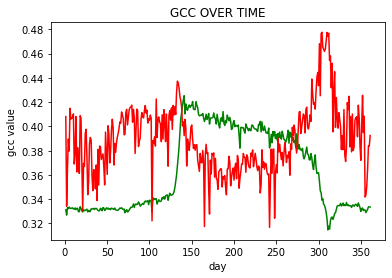

In [33]:
#print g/g+r+b plot
plt.title("GCC OVER TIME")
plt.xlabel("day")
plt.ylabel("gcc value")
plt.plot(np.arange(1,len(image_names)+1), green_over_time, color="green")
plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

361


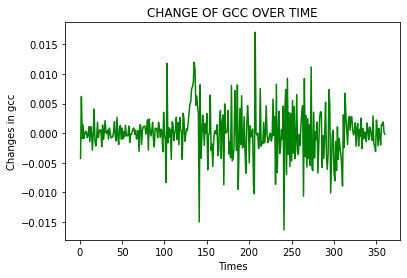

In [22]:
print(len(green_over_time))
derivative_green = []
derivative_red = []
for i in range(1, len(green_over_time)):
    derivative_green.append(green_over_time[i]- green_over_time[i-1])
    derivative_red.append(red_over_time[i]- red_over_time[i-1])

plt.title("CHANGE OF GCC OVER TIME")
plt.xlabel("Times")
plt.ylabel("Changes in gcc")
plt.plot(np.arange(1,len(derivative_green)+1), derivative_green, color="green")
#plt.plot(np.arange(1,len(derivative_red)+1), derivative_red, color="red")
plt.show()   

In [16]:
print(len(derivative_green))

360


# using median of the week, apply green mask on june and do gcc only on the green areas. 

In [17]:
#calculate weekly median
weekly_median_green = []
weekly_green = []

for day_index in range(len(green_over_time)):
    if len(weekly_green) == 7:
        weekly_green.sort()
        weekly_median_green.append(weekly_green[(len(weekly_green)+1)//2])
        weekly_green = []
    weekly_green.append(green_over_time[day_index])
    
weekly_median_green.append(weekly_green[(len(weekly_green)+1)//2])
    

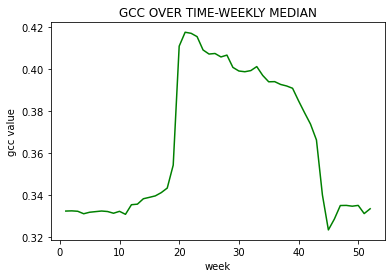

In [18]:
plt.title("GCC OVER TIME-WEEKLY MEDIAN")
plt.xlabel("week")
plt.ylabel("gcc value")
plt.plot(np.arange(1,len(weekly_median_green)+1), weekly_median_green, color="green")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

# canopy: 5-7-9 days windown median (rgg, gcc) for the whole year
ground: snow mask, gcc in the snow mask, derivative, 5 days (gcc)


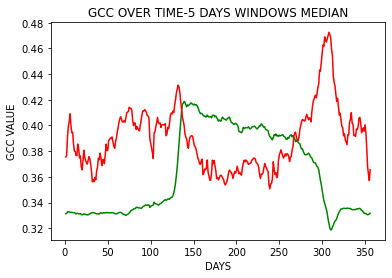

In [27]:
# This is ploting gcc and rcc using median of 5 days windows
five_green = []
five_red = []
green = 0
red = 0
for i in range(0, len(green_over_time)):
    if i > 4 :
        five_green.append(green/5)
        green -= green_over_time[i-5]
        five_red.append(red/5)
        red -= red_over_time[i-5]
    green += green_over_time[i]
    red += red_over_time[i]
plt.title("GCC OVER TIME-5 DAYS WINDOWS MEDIAN")
plt.xlabel("DAYS")
plt.ylabel("GCC VALUE")
plt.plot(np.arange(1,len(five_green)+1), five_green, color="green")
plt.plot(np.arange(1,len(five_red)+1), five_red, color="red")
plt.show()

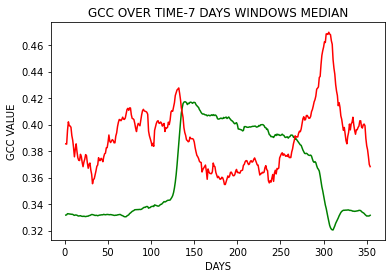

In [28]:
# This is ploting gcc and rcc using median of 7 days windows
seven_green = []
seven_red = []
green = 0
red = 0
for i in range(0, len(green_over_time)):
    if i > 6 :
        seven_green.append(green/7)
        green -= green_over_time[i-7]
        seven_red.append(red/7)
        red -= red_over_time[i-7]
    green += green_over_time[i]
    red += red_over_time[i]
plt.title("GCC OVER TIME-7 DAYS WINDOWS MEDIAN")
plt.xlabel("DAYS")
plt.ylabel("GCC VALUE")
plt.plot(np.arange(1,len(seven_green)+1), seven_green, color="green")
plt.plot(np.arange(1,len(seven_red)+1), seven_red, color="red")
plt.show()

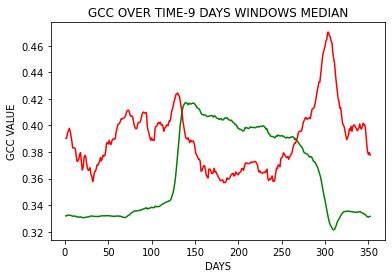

In [29]:
# This is ploting gcc and rcc using median of 9 days windows
nine_green = []
nine_red = []
green = 0
red = 0
for i in range(0, len(green_over_time)):
    if i > 8 :
        nine_green.append(green/9)
        green -= green_over_time[i-9]
        nine_red.append(red/9)
        red -= red_over_time[i-9]
    green += green_over_time[i]
    red += red_over_time[i]
plt.title("GCC OVER TIME-9 DAYS WINDOWS MEDIAN")
plt.xlabel("DAYS")
plt.ylabel("GCC VALUE")
plt.plot(np.arange(1,len(nine_green)+1), nine_green, color="green")
plt.plot(np.arange(1,len(nine_red)+1), nine_red, color="red")
plt.show()